In [1]:
from __future__ import print_function
from keras.engine import Model
from keras_vggface.vggface import VGGFace
from keras.preprocessing import image

import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


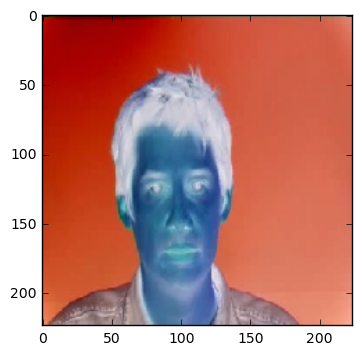

In [17]:
img = image.load_img('first_frame.jpg', target_size=(224,224))
x = image.img_to_array(img) # some fucked up color
plt.imshow(x)

In [18]:
x = np.expand_dims(x, axis=0)
# tf order 'channel-last'
x = x[:, :, :, ::-1]

# Zero-center by mean pixel
x[:, :, :, 0] -= 93.5940
x[:, :, :, 1] -= 104.7624
x[:, :, :, 2] -= 129.1863

In [5]:
from keras.layers import Input

vgg_model = VGGFace()

In [6]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [11]:
from keras import backend as K
input_img = vgg_model.input

# Layer 0

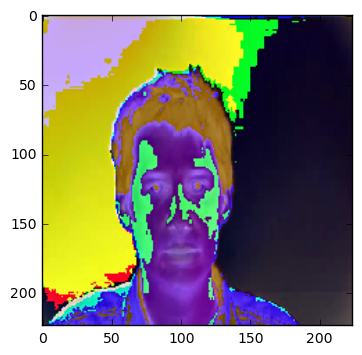

In [13]:
loss0 = K.mean(vgg_model.layers[0].output[:, :, :, 0])
grads0 = K.gradients(loss0, input_img)[0]
iterate0 = K.function([input_img], [loss0, grads0])

input_img_data = x
for i in range(30):
    loss_value, grads_value = iterate0([input_img_data])
    input_img_data += grads_value * 0.1

plt.imshow(input_img_data[0])

# Layer 2

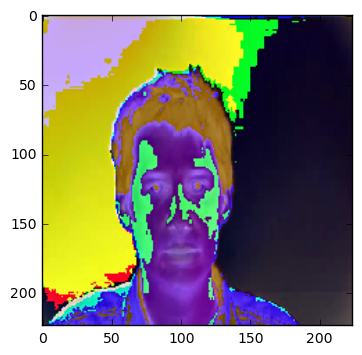

In [14]:
loss2 = K.mean(vgg_model.layers[2].output[:, :, :, 0])
grads2 = K.gradients(loss2, input_img)[0]
iterate2 = K.function([input_img], [loss2, grads2])

input_img_data = x
for i in range(30):
    loss_value, grads_value = iterate2([input_img_data])
    input_img_data += grads_value * 0.1

plt.imshow(input_img_data[0])

# Layer 6

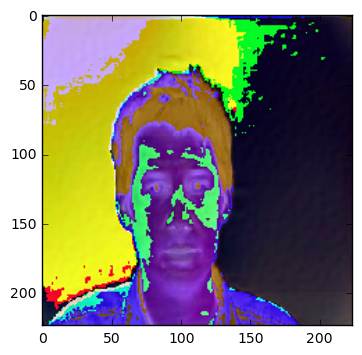

In [25]:
loss6 = K.mean(vgg_model.layers[6].output[:, :, :, 0])
grads6 = K.gradients(loss6, input_img)[0]
iterate6 = K.function([input_img], [loss6, grads6])

input_img_data = x
for i in range(30):
    loss_value, grads_value = iterate6([input_img_data])
    input_img_data += grads_value * 0.1

plt.imshow(input_img_data[0])

# Layer 9

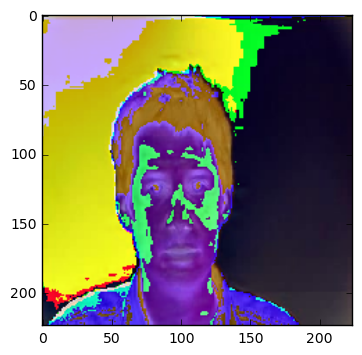

In [21]:
loss9 = K.mean(vgg_model.layers[9].output[:, :, :, 0])
grads9 = K.gradients(loss9, input_img)[0]
iterate9 = K.function([input_img], [loss9, grads9])

input_img_data = x
for i in range(30):
    loss_value, grads_value = iterate9([input_img_data])
    input_img_data += grads_value * 0.1

plt.imshow(input_img_data[0])